In [108]:
# Import Packages
import numpy as np 
import pandas as pd
import datetime as dt
from pylab import mpl, plt
# plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
# %matplotlib inline

In [109]:
# Import Data

raw = raw = pd.read_csv('./tr_eikon_eod_data.csv',
                              index_col=0, parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [110]:
symbol = 'AAPL.O'
data = pd.DataFrame(raw[symbol].dropna())
data

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827
...,...
2018-06-25,182.170000
2018-06-26,184.430000
2018-06-27,184.160000


In [111]:
## Set the SMA values for two different rolling window sizes

SMA1 = 42
SMA2 = 252

In [112]:
data['SMA1'] = data[symbol].rolling(SMA1).mean()
data['SMA2'] = data[symbol].rolling(SMA2).mean()
data

,AAPL.O,SMA1,SMA2
Date,,,
2010-01-04,30.572827,NaN,NaN
2010-01-05,30.625684,NaN,NaN
2010-01-06,30.138541,NaN,NaN
2010-01-07,30.082827,NaN,NaN
2010-01-08,30.282827,NaN,NaN
...,...,...,...
2018-06-25,182.170000,185.606190,168.265556
2018-06-26,184.430000,186.087381,168.418770
2018-06-27,184.160000,186.607381,168.579206


<Axes: xlabel='Date'>

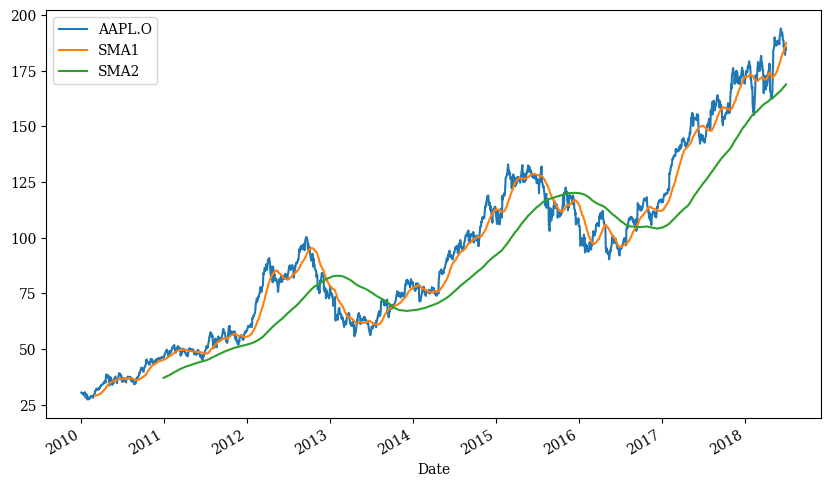

In [113]:
data.plot(figsize=(10,6))

In [114]:
data.dropna(inplace = True)
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1,-1)
data.tail()

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2018-06-25,182.17,185.606190,168.265556,1
2018-06-26,184.43,186.087381,168.418770,1
2018-06-27,184.16,186.607381,168.579206,1
2018-06-28,185.50,187.089286,168.736627,1
2018-06-29,185.11,187.470476,168.901032,1


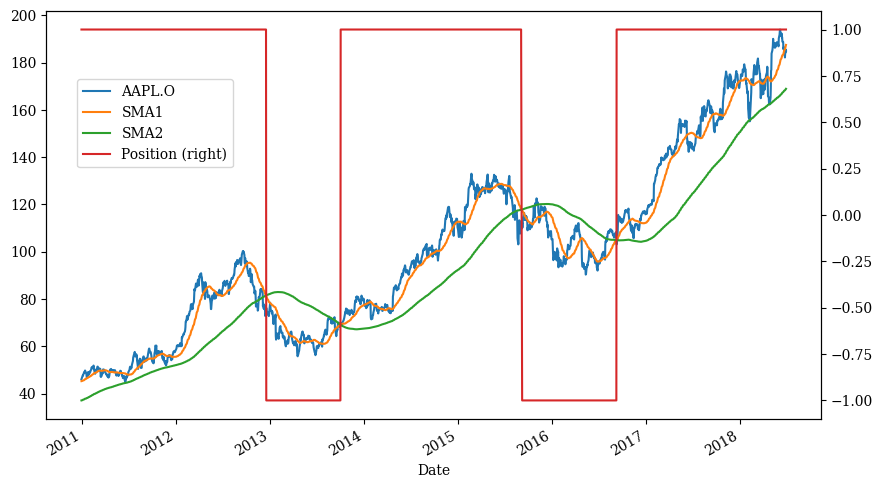

In [115]:
ax = data.plot(secondary_y ='Position', figsize = (10,6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

In [116]:

data['Returns'] = np.log(data[symbol]/ data[symbol].shift(1))
data

,AAPL.O,SMA1,SMA2,Position,Returns
Date,,,,,
2010-12-31,46.079954,45.280967,37.120735,1,NaN
2011-01-03,47.081381,45.349708,37.186246,1,0.021500
2011-01-04,47.327096,45.412599,37.252521,1,0.005205
2011-01-05,47.714238,45.466102,37.322266,1,0.008147
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809
...,...,...,...,...,...
2018-06-25,182.170000,185.606190,168.265556,1,-0.014983
2018-06-26,184.430000,186.087381,168.418770,1,0.012330
2018-06-27,184.160000,186.607381,168.579206,1,-0.001465


In [117]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2010-12-31,46.079954,45.280967,37.120735,1,NaN,NaN
2011-01-03,47.081381,45.349708,37.186246,1,0.021500,0.021500
2011-01-04,47.327096,45.412599,37.252521,1,0.005205,0.005205
2011-01-05,47.714238,45.466102,37.322266,1,0.008147,0.008147
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809,-0.000809
...,...,...,...,...,...,...
2018-06-25,182.170000,185.606190,168.265556,1,-0.014983,-0.014983
2018-06-26,184.430000,186.087381,168.418770,1,0.012330,0.012330
2018-06-27,184.160000,186.607381,168.579206,1,-0.001465,-0.001465


In [118]:
data.round(4).head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2010-12-31,46.0800,45.2810,37.1207,1,NaN,NaN
2011-01-03,47.0814,45.3497,37.1862,1,0.0215,0.0215
2011-01-04,47.3271,45.4126,37.2525,1,0.0052,0.0052
2011-01-05,47.7142,45.4661,37.3223,1,0.0081,0.0081
2011-01-06,47.6757,45.5226,37.3921,1,-0.0008,-0.0008


In [119]:
data.dropna(inplace=True)
data

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2011-01-03,47.081381,45.349708,37.186246,1,0.021500,0.021500
2011-01-04,47.327096,45.412599,37.252521,1,0.005205,0.005205
2011-01-05,47.714238,45.466102,37.322266,1,0.008147,0.008147
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809,-0.000809
2011-01-07,48.017095,45.582089,37.462453,1,0.007136,0.007136
...,...,...,...,...,...,...
2018-06-25,182.170000,185.606190,168.265556,1,-0.014983,-0.014983
2018-06-26,184.430000,186.087381,168.418770,1,0.012330,0.012330
2018-06-27,184.160000,186.607381,168.579206,1,-0.001465,-0.001465


In [120]:
np.exp(data[['Returns', 'Strategy']].sum())


Returns     4.017148
Strategy    5.811299
dtype: float64

In [121]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5

Returns     0.250571
Strategy    0.250407
dtype: float64

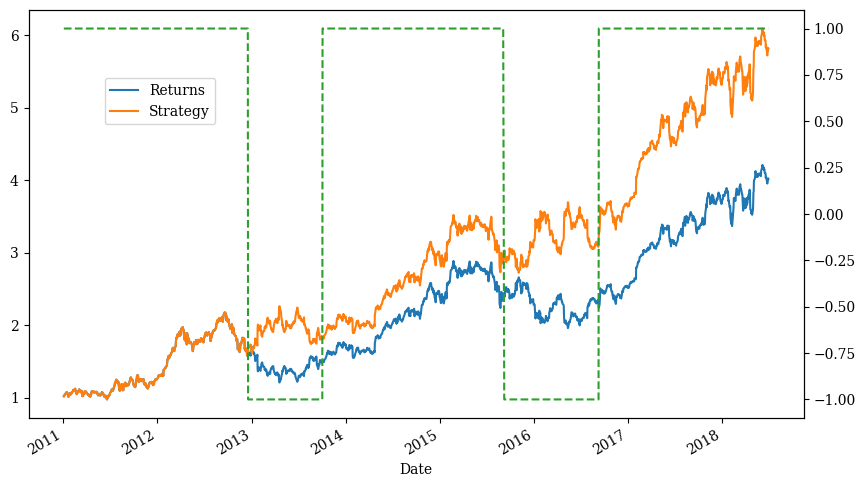

In [122]:
ax = data[['Returns', 'Strategy']].cumsum(
                     ).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [123]:
from itertools import product

sma1 = range(20, 61, 4)
sma2 = range(180, 281, 10)

results = []
for SMA1, SMA2 in product(sma1, sma2):
                 data = pd.DataFrame(raw[symbol])
                 data.dropna(inplace=True)
                 data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
                 data['SMA1'] = data[symbol].rolling(SMA1).mean()
                 data['SMA2'] = data[symbol].rolling(SMA2).mean()
                 data.dropna(inplace=True)
                 data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
                 data['Strategy'] = data['Position'].shift(1) * data['Returns']
                 data.dropna(inplace=True)
                 perf = np.exp(data[['Returns', 'Strategy']].sum())
                 results.append(pd.DataFrame(
                             {'SMA1': SMA1, 'SMA2': SMA2,
                              'MARKET': perf['Returns'],
                              'STRATEGY': perf['Strategy'],
                              'OUT': perf['Strategy'] - perf['Returns']},
                              index=[0]))
                 

results_df = pd.DataFrame(results)
print(results_df.info())

ValueError: Must pass 2-d input. shape=(121, 1, 5)

In [129]:
import pandas as pd
import numpy as np
from itertools import product

# Example setup for raw data, symbol, sma1, sma2
raw = {'symbol': [10, 20, 30, 40, 50], 'other_symbol': [15, 25, 35, 45, 55]}
symbol = "AAPL.O"
sma1 = range(20, 61, 4)
sma2 = range(180, 281, 10)

results = []

for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(raw[symbol])
    data.dropna(inplace=True)

    # Example calculations
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)

    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)

    perf = np.exp(data[['Returns', 'Strategy']].sum())

    results.append({
        'SMA1': SMA1,
        'SMA2': SMA2,
        'MARKET': perf['Returns'],
        'STRATEGY': perf['Strategy'],
        'OUT': perf['Strategy'] - perf['Returns']
    })

results_df = pd.DataFrame(results)
print(results_df.info())
print(results_df.head())


KeyError: 'AAPL.O'

In [130]:
# Plot the stock price and the fast/slow moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Fast_MA'], label='Fast MA (50 days)')
plt.plot(data['Slow_MA'], label='Slow MA (200 days)')
plt.title('Moving Average Crossover Trading Strategy')
plt.legend()

plt.show()

# Plot the trading signals
plt.figure(figsize=(12, 6))
plt.plot(data['Signal'], label='Trading Signal', marker='o', linestyle='')
plt.title('Trading Signals')
plt.legend()

plt.show()

# Plot the cumulative returns of the trading strategy
data['Cumulative_Return'] = (1 + data['Return']).cumprod()
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Trading Strategy')
plt.legend()

plt.show()

KeyError: 'Close'

<Figure size 1200x600 with 0 Axes>